In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [372]:
# Sigmoid activation for the perceptron
def sigmoid(z, diff = False):
    s = 1 / (1 + np.exp(-z))
    if diff: return s * (1 - s)
    return s

class Perceptron:
    def __init__(self, in_size):
        self.W = np.random.randn(1, in_size)
        self.b = 1.0
        self.in_size = in_size
    
    def apply(self, x):
        return np.dot(self.W, x) + self.b
    
    def predict(self, x):
        return np.round(sigmoid(self.apply(x)))
    
    def gradient(self, batch):
        N = len(batch)
        nabla_b, nabla_W = 0, np.zeros(self.W.shape)
        for (x, y) in batch:
            z = self.apply(x)
            a = sigmoid(z)
            delta = (a - y) * sigmoid(z, diff = True)
            dW = delta * x
            nabla_b += delta
            nabla_W += dW
            
        return nabla_b, nabla_W
    
    def loss(self, batch):
        return np.mean([(1/2)*(self.predict(x) - y)**2 
                                            for (x, y) in batch])
    
    def accuracy(self, batch):
        return sum([self.predict(x) == y for (x, y) in batch]) / len(batch)
    
    def train(self, data, learning_rate, epochs, test_split = 0.2, verbose = True):
        # Splitting training and testing data
        pivot = int(test_split * len(data))
        train_data, test_data = data[pivot:], data[:pivot]
        
        # Keeping track of losses and accuracy during training
        losses, accuracies = [], []
        
        for e in range(epochs):
            np.random.shuffle(train_data)
            
            db, dW = self.gradient(train_data)
            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            
            l, a = self.loss(train_data), self.accuracy(test_data)
            losses.append(l)
            accuracies.append(a)
            
            if verbose:
                print("Training complete for epoch {}.\nLoss: {}. Test Accuracy: {}".format(e + 1, l, a))
        
        return losses, accuracies

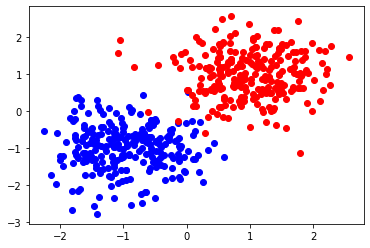

In [381]:
# Loading data
import pickle
f = open("cluster.pickle", "rb")
cluster_data = pickle.load(f)
f.close()

for (x, y) in cluster_data:
    if y == 0:
        plt.scatter(*x, color = "blue")
    elif y == 1:
        plt.scatter(*x, color = "red")

In [378]:
# Constructing the Perceptron
clustertron = Perceptron(2)
clustertron.accuracy(cluster_data)

array([0.412])

Training complete for epoch 1.
Loss: 0.22125. Test Accuracy: [0.54]
Training complete for epoch 2.
Loss: 0.09. Test Accuracy: [0.77]
Training complete for epoch 3.
Loss: 0.0375. Test Accuracy: [0.87]
Training complete for epoch 4.
Loss: 0.02375. Test Accuracy: [0.95]
Training complete for epoch 5.
Loss: 0.015. Test Accuracy: [0.97]
Training complete for epoch 6.
Loss: 0.0125. Test Accuracy: [0.97]
Training complete for epoch 7.
Loss: 0.0125. Test Accuracy: [0.97]
Training complete for epoch 8.
Loss: 0.0125. Test Accuracy: [0.98]
Training complete for epoch 9.
Loss: 0.0125. Test Accuracy: [0.99]
Training complete for epoch 10.
Loss: 0.01125. Test Accuracy: [1.]


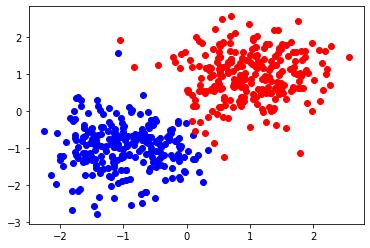

In [379]:
clustertron.train(cluster_data, 0.01, 10);

for (x, y) in cluster_data:
    if clustertron.predict(x) == 0:
        plt.scatter(*x, label = "Cluster 0", color = "blue")
    elif clustertron.predict(x) == 1:
        plt.scatter(*x, label = "Cluster 1", color = "red")
plt.show()